In [5]:
import pandas as pd
import numpy as np
import requests
import json
from scipy.stats import linregress
from citipy import citipy
import random
from config import api_key
import time
import matplotlib.pyplot as plt

In [6]:
# exploring citypy
#https://github.com/wingchen/citipy#looking-up-with-coordinates
city = citipy.nearest_city(41.8, -87.6)

In [7]:
city.city_name

'chicago'

In [8]:
city.country_code

'us'

In [9]:
lat_range = (-90, 90)
lng_range = (-180, 180)

In [10]:
lat_lngs = []
cities = []

In [11]:
lats = np.random.uniform(-90, 90, size = 1500)
longs = np.random.uniform(-180, 180, size = 1500)

In [12]:
lat_longs=pd.DataFrame({"latitude":lats,
                       "longitude":longs})
# putting these intermediate variables in dataframes instead of lists 
# to prevent weirdness with blank values

In [13]:
lat_longs

,latitude,longitude
0,-85.604032,-111.656194
1,45.086606,78.199850
2,-8.365982,-89.880216
3,-9.670463,134.204299
4,-41.351828,-57.536471
...,...,...
1495,-83.531168,76.699912
1496,-79.306922,-75.096675
1497,24.771900,171.280538
1498,-52.021185,73.955616


In [14]:
cities = []

for index, row in lat_longs.iterrows():
    city = citipy.nearest_city(row["latitude"], row["longitude"]).city_name
    
    if city not in cities:
        cities.append(city)



In [15]:
len(cities)

631

In [16]:
weather=pd.DataFrame({"city":cities,
                    "latitude":"",
                      "longitude":"",
                      "temperature":"",
                      "humidity":"",
                      "cloudiness":"",
                      "wind":"",
                      "datetime":"",
                      "country":""})

weather.head()

,city,latitude,longitude,temperature,humidity,cloudiness,wind,datetime,country
0,punta arenas,,,,,,,,
1,kirovskiy,,,,,,,,
2,san cristobal,,,,,,,,
3,maningrida,,,,,,,,
4,necochea,,,,,,,,


In [15]:
# open weather api:
# https://openweathermap.org/current
# https://api.openweathermap.org/data/2.5/weather?q={city name}&appid={API key}

In [17]:
# running an api call on open weather with one test city

In [18]:
test = "husavik"

In [19]:
response = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={test}&appid={api_key}&units=imperial").json()

In [20]:
print(json.dumps(response, indent=4, sort_keys=True))

{
    "base": "stations",
    "clouds": {
        "all": 75
    },
    "cod": 200,
    "coord": {
        "lat": 66.0449,
        "lon": -17.3389
    },
    "dt": 1611948182,
    "id": 2629833,
    "main": {
        "feels_like": 5.67,
        "humidity": 86,
        "pressure": 1010,
        "temp": 15.8,
        "temp_max": 15.8,
        "temp_min": 15.8
    },
    "name": "Husavik",
    "sys": {
        "country": "IS",
        "id": 83,
        "sunrise": 1611915374,
        "sunset": 1611937716,
        "type": 1
    },
    "timezone": 0,
    "visibility": 10000,
    "weather": [
        {
            "description": "broken clouds",
            "icon": "04n",
            "id": 803,
            "main": "Clouds"
        }
    ],
    "wind": {
        "deg": 197,
        "speed": 8.01
    }
}


In [21]:
#locating info in the open weather json

#latitude
response["coord"]["lat"]

66.0449

In [22]:
#longitude
response["coord"]["lon"]

-17.3389

In [23]:
#temp
response["main"]["temp"]

15.8

In [24]:
#humidity
response["main"]["humidity"]

86

In [25]:
#cloudiness
response["clouds"]["all"]

75

In [26]:
#wind
response["wind"]["speed"]

8.01

In [27]:
#datetime
response["dt"]

1611948182

In [28]:
#country, need it for the hotel map!
response["sys"]["country"]

'IS'

In [29]:
for index, row in weather.iterrows():
    city = row["city"]
    
    not_json_yet = requests.get(f"http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=imperial")
    
    if not_json_yet.status_code == 200:
        
        response = not_json_yet.json()
    
        weather.loc[index, "latitude"] = response["coord"]["lat"]
        weather.loc[index, "longitude"] = response["coord"]["lon"]
        weather.loc[index, "temperature"] = response["main"]["temp"]
        weather.loc[index, "humidity"] = response["main"]["humidity"]
        weather.loc[index, "cloudiness"] = response["clouds"]["all"]
        weather.loc[index, "wind"] = response["wind"]["speed"]
        weather.loc[index, "datetime"] = response["dt"]
        weather.loc[index, "country"] = response["sys"]["country"]
    
        print(f"Pulling weather for city #{index}, {city}")
    
        time.sleep(1)
        #to prevent maxing out the api call, thanks to Shaun in the class slack for the syntax
    
    else: 
        print(f"no data for city #{index}, {city}")

Pulling weather for city #0, punta arenas
Pulling weather for city #1, kirovskiy
Pulling weather for city #2, san cristobal
Pulling weather for city #3, maningrida
Pulling weather for city #4, necochea
Pulling weather for city #5, kaitangata
Pulling weather for city #6, ushuaia
Pulling weather for city #7, cape town
Pulling weather for city #8, cherskiy
Pulling weather for city #9, jamestown
Pulling weather for city #10, tasiilaq
Pulling weather for city #11, rikitea
Pulling weather for city #12, sao joao da barra
Pulling weather for city #13, sinnamary
Pulling weather for city #14, sept-iles
Pulling weather for city #15, mataura
Pulling weather for city #16, hilo
Pulling weather for city #17, ust-nera
Pulling weather for city #18, namibe
Pulling weather for city #19, dalbandin
Pulling weather for city #20, sistranda
Pulling weather for city #21, meulaboh
Pulling weather for city #22, tessalit
Pulling weather for city #23, newtownards
Pulling weather for city #24, pisco
Pulling weather

Pulling weather for city #207, nhulunbuy
Pulling weather for city #208, grajau
Pulling weather for city #209, milkovo
Pulling weather for city #210, omsukchan
Pulling weather for city #211, mandasa
Pulling weather for city #212, xinzhou
Pulling weather for city #213, carupano
Pulling weather for city #214, tazovskiy
Pulling weather for city #215, alofi
Pulling weather for city #216, guerrero negro
Pulling weather for city #217, sao jose da coroa grande
Pulling weather for city #218, anloga
Pulling weather for city #219, rogatica
Pulling weather for city #220, port lincoln
Pulling weather for city #221, tarko-sale
Pulling weather for city #222, the valley
no data for city #223, mendahara
Pulling weather for city #224, ust-omchug
Pulling weather for city #225, lompoc
Pulling weather for city #226, barrow
Pulling weather for city #227, ucluelet
Pulling weather for city #228, port hedland
Pulling weather for city #229, touros
Pulling weather for city #230, calarasi
Pulling weather for city

Pulling weather for city #415, dingle
no data for city #416, grand centre
Pulling weather for city #417, ancud
Pulling weather for city #418, skibbereen
Pulling weather for city #419, gravdal
Pulling weather for city #420, mocuba
Pulling weather for city #421, beringovskiy
Pulling weather for city #422, bubaque
Pulling weather for city #423, ilulissat
Pulling weather for city #424, hofn
Pulling weather for city #425, fairbanks
Pulling weather for city #426, bougouni
Pulling weather for city #427, rehoboth
Pulling weather for city #428, berdigestyakh
Pulling weather for city #429, green river
Pulling weather for city #430, cidreira
Pulling weather for city #431, kezmarok
Pulling weather for city #432, college
Pulling weather for city #433, turkmenabat
Pulling weather for city #434, porto seguro
Pulling weather for city #435, tarauaca
Pulling weather for city #436, mpongwe
Pulling weather for city #437, east london
Pulling weather for city #438, dengzhou
Pulling weather for city #439, bo

Pulling weather for city #623, baghdad
Pulling weather for city #624, mirnyy
Pulling weather for city #625, kudymkar
Pulling weather for city #626, haimen
Pulling weather for city #627, kargil
Pulling weather for city #628, howard springs
Pulling weather for city #629, brokopondo
Pulling weather for city #630, constantine


In [30]:
weather

,city,latitude,longitude,temperature,humidity,cloudiness,wind,datetime,country
0,punta arenas,-53.15,-70.9167,48.09,66,75,25.32,1611948215,CL
1,kirovskiy,45.0917,133.514,-23.69,86,4,2.57,1611948216,RU
2,san cristobal,7.7669,-72.225,84.2,58,40,13.8,1611947928,VE
3,maningrida,-12.0667,134.267,76.3,91,81,6.11,1611948218,AU
4,necochea,-38.5473,-58.7368,78.01,42,35,6.8,1611948219,AR
...,...,...,...,...,...,...,...,...,...
626,haimen,23.1935,116.614,51.8,66,0,4.47,1611948902,CN
627,kargil,34.5667,76.1,-10.07,78,6,1.74,1611948904,IN
628,howard springs,-12.497,131.047,74.71,100,90,21.85,1611948905,AU
629,brokopondo,4.75,-55.1667,79.81,85,100,7.58,1611948906,SR


In [31]:
# dropping the rows that didn't get any info returned in the api call
weather.drop(weather.loc[weather["latitude"] == "",:].index, inplace=True)
# borrowed from https://stackoverflow.com/questions/13851535/how-to-delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression

In [32]:
weather

,city,latitude,longitude,temperature,humidity,cloudiness,wind,datetime,country
0,punta arenas,-53.15,-70.9167,48.09,66,75,25.32,1611948215,CL
1,kirovskiy,45.0917,133.514,-23.69,86,4,2.57,1611948216,RU
2,san cristobal,7.7669,-72.225,84.2,58,40,13.8,1611947928,VE
3,maningrida,-12.0667,134.267,76.3,91,81,6.11,1611948218,AU
4,necochea,-38.5473,-58.7368,78.01,42,35,6.8,1611948219,AR
...,...,...,...,...,...,...,...,...,...
626,haimen,23.1935,116.614,51.8,66,0,4.47,1611948902,CN
627,kargil,34.5667,76.1,-10.07,78,6,1.74,1611948904,IN
628,howard springs,-12.497,131.047,74.71,100,90,21.85,1611948905,AU
629,brokopondo,4.75,-55.1667,79.81,85,100,7.58,1611948906,SR


In [33]:
#printing to csv
weather.to_csv("results/weather_data.csv", index=False)

In [35]:
# scatter plots

# data note: my cities list doesn't have any latitudes below -60, but it's not a sampling
# problem. There just aren't any cities below that latitude!

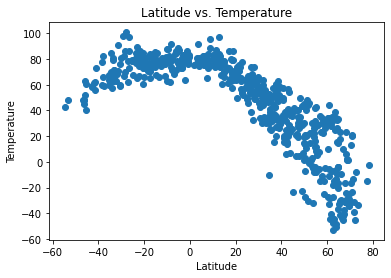

In [36]:
plt.scatter(weather["latitude"], weather["temperature"])
plt.title("Latitude vs. Temperature")
plt.ylabel("Temperature")
plt.xlabel("Latitude")
plt.savefig("results/temperature.png")

In [37]:
# Each dot in this scatterplot represents one city. Its position on the x axis shows 
# how farth north or south it is on earth, with 0 as the equator. Its position on the 
# y axis shows how hot it was there at the time the data was pulled. 

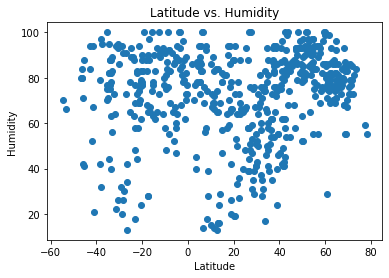

In [38]:
plt.scatter(weather["latitude"], weather["humidity"])
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Latitude")
plt.savefig("results/humidity.png")

In [39]:
# Each dot in this scatterplot represents one city. Its position on the x axis shows 
# how farth north or south it is on earth, with 0 as the equator. Its position on the 
# y axis shows how humid it was there at the time the data was pulled.

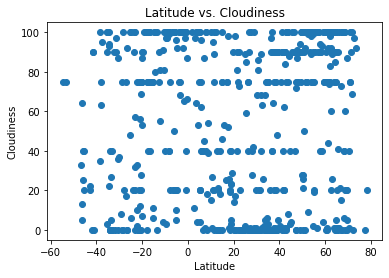

In [40]:
plt.scatter(weather["latitude"], weather["cloudiness"])
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.savefig("results/clouds.png")

In [42]:
# Each dot in this scatterplot represents one city. Its position on the x axis shows how 
# farth north or south it is on earth, with 0 as the equator. Its position on the y axis 
# shows how cloudy it was there at the time the data was pulled. The horizontal bands 
# probably mean that the data isn't precise down to 1% - many data points are 
# probably estimates of 0%, 20%, 40% etc. cloud cover.

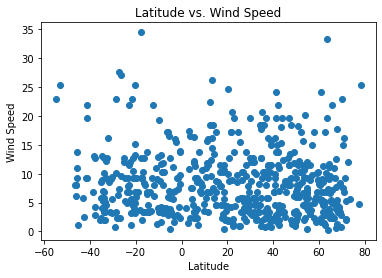

In [41]:
plt.scatter(weather["latitude"], weather["wind"])
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Latitude")
plt.savefig("results/wind.png")

In [42]:
# Each dot in this scatterplot represents one city. Its position on the x axis shows how 
# farth north or south it is on earth, with 0 as the equator. Its position on the y axis 
# shows the wind speed at the time the data was pulled. 

In [45]:
#regressions! splitting the data into northern vs southern hemisphere and plotting from each one.

In [43]:
north = weather.loc[weather["latitude"]>0,:]
south = weather.loc[weather["latitude"]<=0,:]

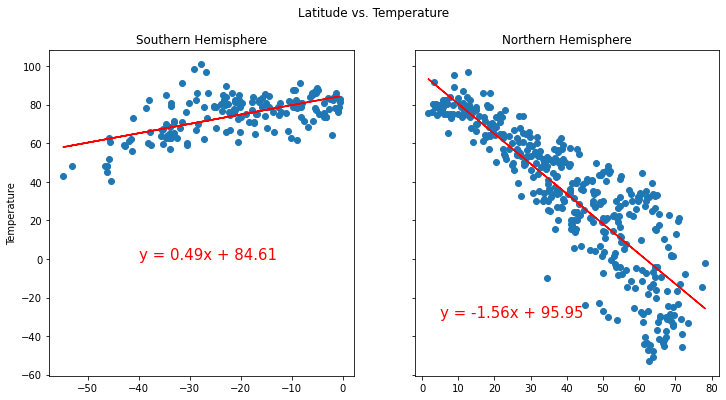

In [44]:
fig, (south_sub, north_sub) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))
fig.suptitle("Latitude vs. Temperature")
south_sub.set_ylabel("Temperature")

south_sub.scatter(south["latitude"],south["temperature"])
south_sub.set_title("Southern Hemisphere")

(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(south["latitude"].astype(float),south["temperature"].astype(float))
south_regress = south["latitude"] * south_slope + south_intercept
south_line = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))

south_sub.plot(south["latitude"],south_regress,"r-")
south_sub.annotate(south_line,(-40,0),fontsize=15,color="red")


north_sub.scatter(north["latitude"],north["temperature"])
north_sub.set_title("Northern Hemisphere")

(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(north["latitude"].astype(float),north["temperature"].astype(float))
north_regress = north["latitude"] * north_slope + north_intercept
north_line = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))

north_sub.plot(north["latitude"],north_regress,"r-")
north_sub.annotate(north_line,(5,-30),fontsize=15,color="red")

plt.savefig("results/N&S temperature with regressions.png")

# cast df columns as floats based on this thread: https://stackoverflow.com/questions/53200129/attributeerror-float-object-has-no-attribute-shape-when-using-linregress
# after getting an error in the linear regression

In [45]:
# The linear regression shows how much temperature varies with latitude in each hemisphere 
# at the time the data was pulled. In each case, temperature decreases with latitudes farther 
# away from the equator. At the moment it varies much more with latitude in the northern 
# hemisphere, most likely because it is winter here, so temperatures are able to get lower.
# But, I expect that if we re ran this in July, we would still not see as strong a correlation 
# in southern hemisphere as we do now for the northern hemisphere, because the cities in 
# the southern hemisphere are much more clustered in the tropical & subtropical regions (about
# <35 degrees latitude) where temperatures vary less with the seasons.

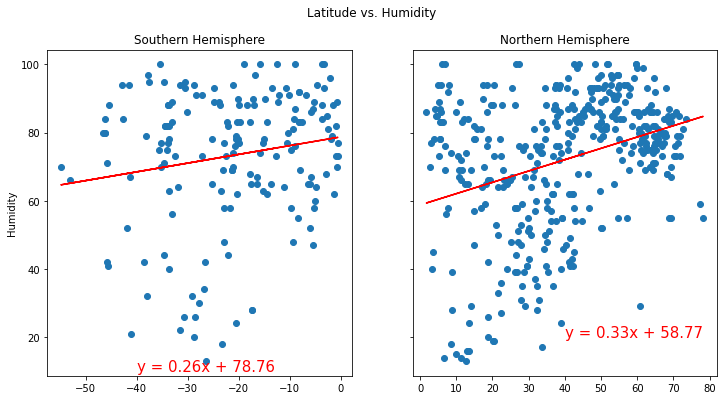

In [46]:
fig, (south_sub, north_sub) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))
fig.suptitle("Latitude vs. Humidity")
south_sub.set_ylabel("Humidity")

south_sub.scatter(south["latitude"],south["humidity"])
south_sub.set_title("Southern Hemisphere")

(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(south["latitude"].astype(float),south["humidity"].astype(float))
south_regress = south["latitude"] * south_slope + south_intercept
south_line = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))

south_sub.plot(south["latitude"],south_regress,"r-")
south_sub.annotate(south_line,(-40,10),fontsize=15,color="red")


north_sub.scatter(north["latitude"],north["humidity"])
north_sub.set_title("Northern Hemisphere")

(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(north["latitude"].astype(float),north["humidity"].astype(float))
north_regress = north["latitude"] * north_slope + north_intercept
north_line = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))

north_sub.plot(north["latitude"],north_regress,"r-")
north_sub.annotate(north_line,(40,20),fontsize=15,color="red")

plt.savefig("results/N&S humidity with regressions.png")

In [48]:
# The linear regression shows how much humidity varies with latitude in each hemisphere at 
# the time the data was pulled. In the southern hemisphere, humidity increases as latitudes 
# approach the equator, but in the northern hemisphere, they decrease. The Northern
# hemisphere's results are strongly affected by the sahara desert (lat 0-30 and of course, 
# very dry). We can see that that is where almost all of the driest cities in the northern 
# hemisphere are:

north.loc[north["humidity"]<30,:]

,city,latitude,longitude,temperature,humidity,cloudiness,wind,datetime,country
19,dalbandin,28.8947,64.4101,52.81,29,100,5.32,1611948236,PK
22,tessalit,20.1986,1.0114,69.19,19,0,10.02,1611948240,ML
54,arlit,18.7369,7.3853,69.42,20,3,11.5,1611948277,NE
73,kutum,14.2,24.6667,60.87,29,18,13.49,1611948296,SD
167,ati,13.2154,18.3353,78.12,16,0,14.41,1611948395,TD
188,kedougou,12.5579,-12.1743,96.8,13,0,6.91,1611948418,SN
192,bogande,12.9714,-0.1436,79.97,16,0,9.6,1611948421,BF
248,dhuwaran,22.2333,72.8,62.91,27,73,8.88,1611948484,IN
250,narsaq,60.9167,-46.05,44.6,29,75,24.16,1611948487,GL
281,calabozo,8.9242,-67.4293,95.58,28,39,7.92,1611948521,VE


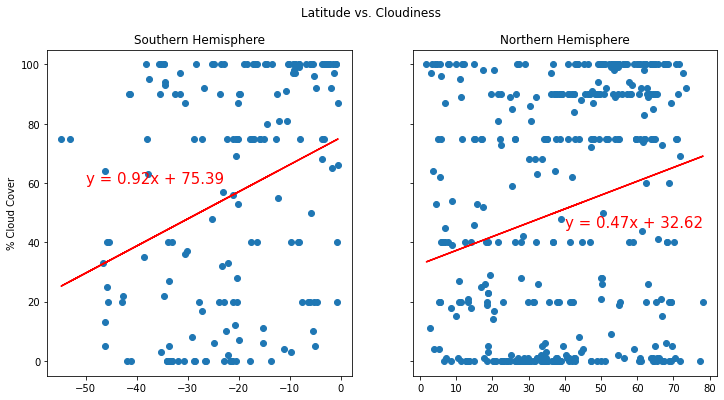

In [49]:
fig, (south_sub, north_sub) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))
fig.suptitle("Latitude vs. Cloudiness")
south_sub.set_ylabel("% Cloud Cover")

south_sub.scatter(south["latitude"],south["cloudiness"])
south_sub.set_title("Southern Hemisphere")

(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(south["latitude"].astype(float),south["cloudiness"].astype(float))
south_regress = south["latitude"] * south_slope + south_intercept
south_line = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))

south_sub.plot(south["latitude"],south_regress,"r-")
south_sub.annotate(south_line,(-50,60),fontsize=15,color="red")

north_sub.scatter(north["latitude"],north["cloudiness"])
north_sub.set_title("Northern Hemisphere")

(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(north["latitude"].astype(float),north["cloudiness"].astype(float))
north_regress = north["latitude"] * north_slope + north_intercept
north_line = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))

north_sub.plot(north["latitude"],north_regress,"r-")
north_sub.annotate(north_line,(40,45),fontsize=15,color="red")

plt.savefig("results/N&S cloud cover with regressions.png")

In [52]:
# The linear regression shows how much humidity varies with latitude in each hemisphere 
# at the time the data was pulled. In the southern hemisphere, cloud cover increases as 
# latitudes approach the equator, but in the northern hemisphere, it decreases. This is 
# most likely an effect of humidity.

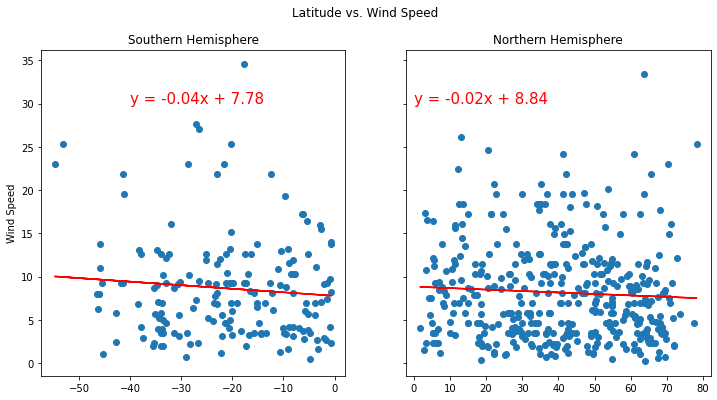

In [52]:
fig, (south_sub, north_sub) = plt.subplots(nrows=1, ncols=2, sharey=True, figsize=(12, 6))
fig.suptitle("Latitude vs. Wind Speed")
south_sub.set_ylabel("Wind Speed")

south_sub.scatter(south["latitude"],south["wind"])
south_sub.set_title("Southern Hemisphere")

(south_slope, south_intercept, south_rvalue, south_pvalue, south_stderr) = linregress(south["latitude"].astype(float),south["wind"].astype(float))
south_regress = south["latitude"] * south_slope + south_intercept
south_line = "y = " + str(round(south_slope,2)) + "x + " + str(round(south_intercept,2))

south_sub.plot(south["latitude"],south_regress,"r-")
south_sub.annotate(south_line,(-40,30),fontsize=15,color="red")

north_sub.scatter(north["latitude"],north["wind"])
north_sub.set_title("Northern Hemisphere")

(north_slope, north_intercept, north_rvalue, north_pvalue, north_stderr) = linregress(north["latitude"].astype(float),north["wind"].astype(float))
north_regress = north["latitude"] * north_slope + north_intercept
north_line = "y = " + str(round(north_slope,2)) + "x + " + str(round(north_intercept,2))

north_sub.plot(north["latitude"],north_regress,"r-")
north_sub.annotate(north_line,(0,30),fontsize=15,color="red")

plt.savefig("results/N&S wind speed with regressions.png")

In [56]:
# The linear regression shows how much wind speed varies with latitude in each hemisphere 
# at the time the data was pulled. In both hemispheres there is no strong correlation,
# but every time I've run it you can spot Tierra Del Fuego (latitude <-50 and always really 
# stormy), and usually a great cluster of windy cities around 40 degrees north, in the 
# path of the trade winds

In [51]:
#Tierra Del Fuego!

weather.loc[weather["latitude"]<-50,:]

,city,latitude,longitude,temperature,humidity,cloudiness,wind,datetime,country
0,punta arenas,-53.15,-70.9167,48.09,66,75,25.32,1611948215,CL
6,ushuaia,-54.8,-68.3,42.8,70,75,23.02,1611947996,AR
